In [28]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv("data.csv")

In [30]:
sequences = data["input"]
len(sequences)

18731

In [31]:
sequence_lengths = data["input"].apply(len)

mean_length = np.mean(sequence_lengths)
median_length = np.median(sequence_lengths)
max_length = np.max(sequence_lengths)

print(f"Mean length: {mean_length}")
print(f"Median length: {median_length}")
print(f"Maximum length: {max_length}")

Mean length: 213.95841119000588
Median length: 172.0
Maximum length: 1723


In [32]:
percentile_70 = np.percentile(sequence_lengths, 70)
percentile_75 = np.percentile(sequence_lengths, 75)
percentile_80 = np.percentile(sequence_lengths, 80)
percentile_85 = np.percentile(sequence_lengths, 85)
percentile_90 = np.percentile(sequence_lengths, 90)
percentile_95 = np.percentile(sequence_lengths, 95)


print(f"70th percentile: {percentile_70}")
print(f"75th percentile: {percentile_75}")
print(f"80th percentile: {percentile_80}")
print(f"85th percentile: {percentile_85}")
print(f"90th percentile: {percentile_90}")
print(f"95th percentile: {percentile_95}")


70th percentile: 259.0
75th percentile: 286.0
80th percentile: 316.0
85th percentile: 351.0
90th percentile: 401.0
95th percentile: 487.0


In [33]:
median = np.median([259,286,316,351,401,487])
median

333.5

In [34]:
num_duplicates = data["input"].duplicated().sum()
print(f"Number of duplicate sequences: {num_duplicates}")

Number of duplicate sequences: 0


In [35]:
char_counts = Counter("".join(sequences))
sorted_counts = sorted(char_counts.items(), key=lambda x: x[1], reverse=True)
print("Most common characters:", sorted_counts)

Most common characters: [('L', 374931), ('A', 330590), ('G', 292341), ('V', 284981), ('E', 275057), ('S', 240973), ('D', 235280), ('K', 232337), ('I', 230995), ('T', 216550), ('R', 205771), ('P', 182040), ('N', 168923), ('F', 160350), ('Q', 148341), ('Y', 138805), ('H', 93682), ('M', 70887), ('W', 54866), ('C', 38960), ('X', 17527), ('a', 3250), ('b', 2338), ('c', 1676), ('d', 1371), ('e', 880), ('f', 697), ('g', 504), ('h', 436), ('i', 317), ('j', 269), ('l', 212), ('k', 210), ('m', 163), ('n', 162), ('o', 147), ('p', 136), ('q', 116), ('r', 108), ('s', 98), ('t', 89), ('u', 65), ('v', 57), ('w', 50), ('x', 45), ('y', 40), ('z', 32)]


In [36]:
def sequence_entropy(seq):
    freqs = np.array(list(Counter(seq).values()))
    return entropy(freqs, base=2)

data["Entropy"] = data["input"].apply(sequence_entropy)
print(f"Mean entropy: {data['Entropy'].mean():.2f}")


Mean entropy: 4.01


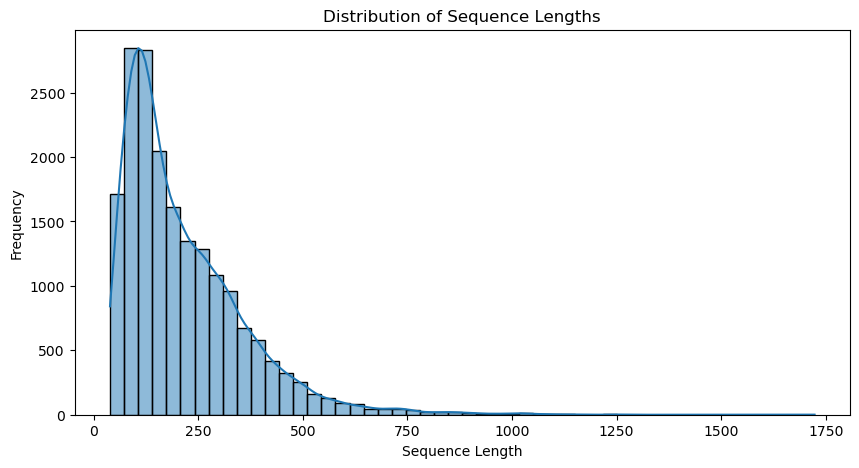

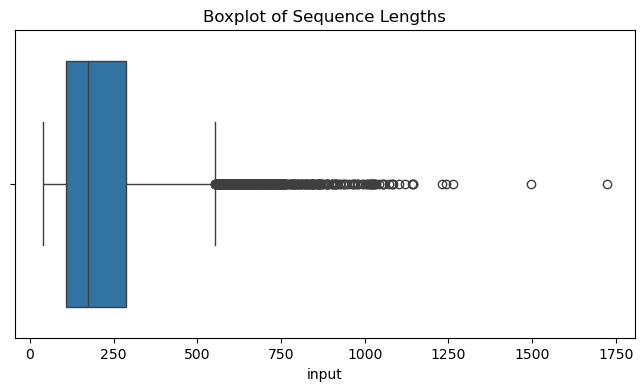

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(sequence_lengths, bins=50, kde=True)
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("Distribution of Sequence Lengths")
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=sequence_lengths)
plt.title("Boxplot of Sequence Lengths")
plt.show()
